In [1]:
# Feature Selection

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [67]:
pd.pandas.set_option('display.max_columns', None)

In [68]:
train=pd.read_csv('X_train.csv')

In [69]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage nan,MasVnrArea nan,GarageYrBlt nan
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,12.247694,0,0,0
1,2,20,3,4.382027,9.169518,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,12.109011,0,0,0
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,12.317167,0,0,0
3,4,70,3,4.094345,9.164296,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,11.849398,0,0,0
4,5,60,3,4.430817,9.565214,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,12.429216,0,0,0


In [70]:
train.shape

(1460, 84)

In [71]:
# First Seprate Dependent Variables
y_train=train['SalePrice']

In [72]:
x_train=train.drop(['SalePrice','Id'],axis=1)

In [73]:
# Now Lets Do Feature Selection
fea_sel_modl=SelectFromModel(Lasso(alpha=0.005,random_state=101))
fea_sel_modl.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=101))

In [74]:
fea_sel_modl.get_support()

array([ True,  True, False,  True, False, False, False, False, False,
        True, False,  True, False, False, False,  True,  True,  True,
        True,  True, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False,  True, False,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
       False,  True, False, False, False, False, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [75]:
# Now lets see selected features
sel_features=x_train.columns[(fea_sel_modl.get_support())]

In [76]:
sel_features.shape

(38,)

In [77]:
# Now lets See Selected Features
sel_features

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Foundation', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'SaleCondition'],
      dtype='object')

In [78]:
fx_train=train[sel_features]

In [79]:
fx_train.shape

(1460, 38)

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [81]:
X_train, X_test, y_train, y_test = train_test_split(fx_train, y_train, test_size=0.33, random_state=42)

In [82]:
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [83]:
pred=model.predict(X_test)

In [47]:
# Now lets See Model Evaluations

In [52]:
from sklearn import metrics

In [57]:
# R Square Error
score1=metrics.r2_score(y_test,pred)


# Mean Absolute Error
score2=metrics.mean_absolute_error(y_test,pred)

print("R Square Error ",score1)
print("Mean Absolute Error ",score2)

R Square Error  0.8809558554642226
Mean Absolute Error  0.09562820743306423


In [59]:
# Now Lets Vissualize the actual and Predicted Values
import matplotlib.pyplot as  plt

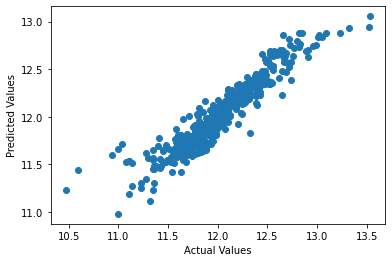

In [85]:
plt.scatter(x=y_test,y=pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [61]:
y_train.shape

(978,)

In [62]:
pred.shape

(482,)